Abby did some really cool tests with a new sub-Chandra network.  Here are some notes taken largely from Slack discussion. See also [my notes](http://nbviewer.jupyter.org/url/amjacobs.net/assets/NBs/RxnNotes.ipynb) on important sub-Chandra reactions.

In [4]:
from IPython.display import Image, display
abby_abundance = Image('react_subch2_test0045-4_xn_compare_2tests_samegraph.png')
abby_energetics = Image('react_subch2_test0045-4_edot_compare_2tests_samegraph.png')

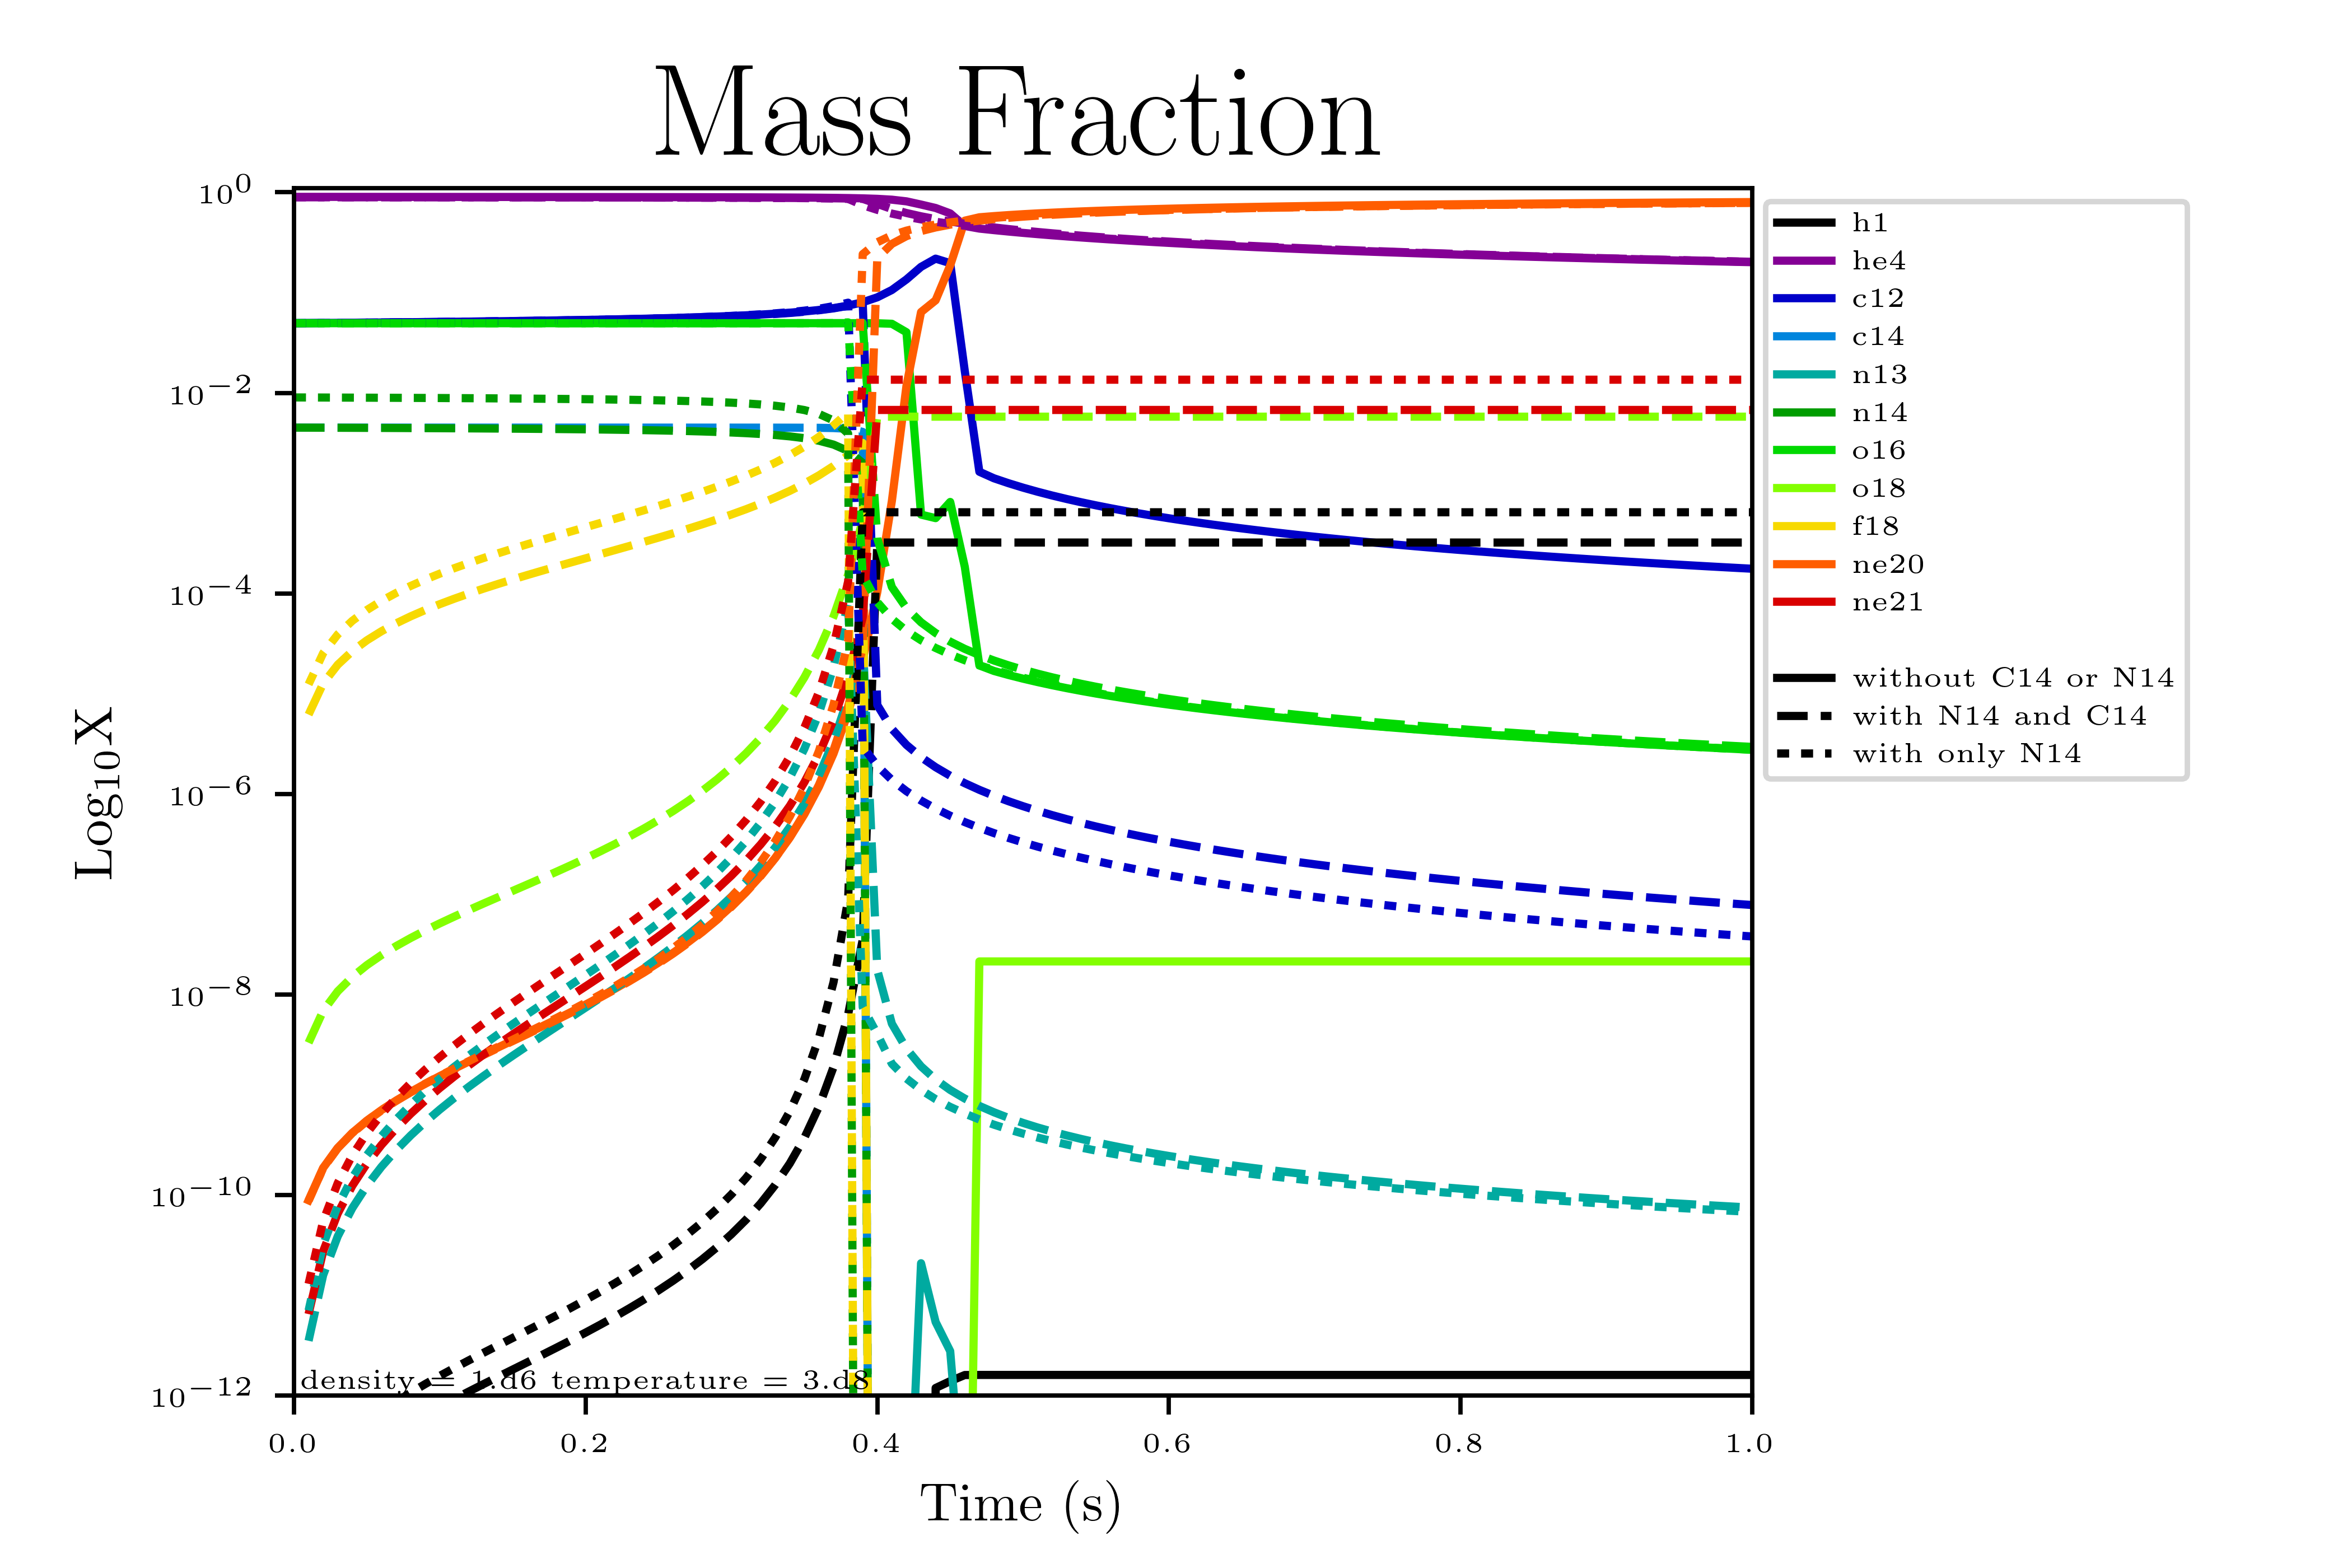

In [5]:
display(abby_abundance)

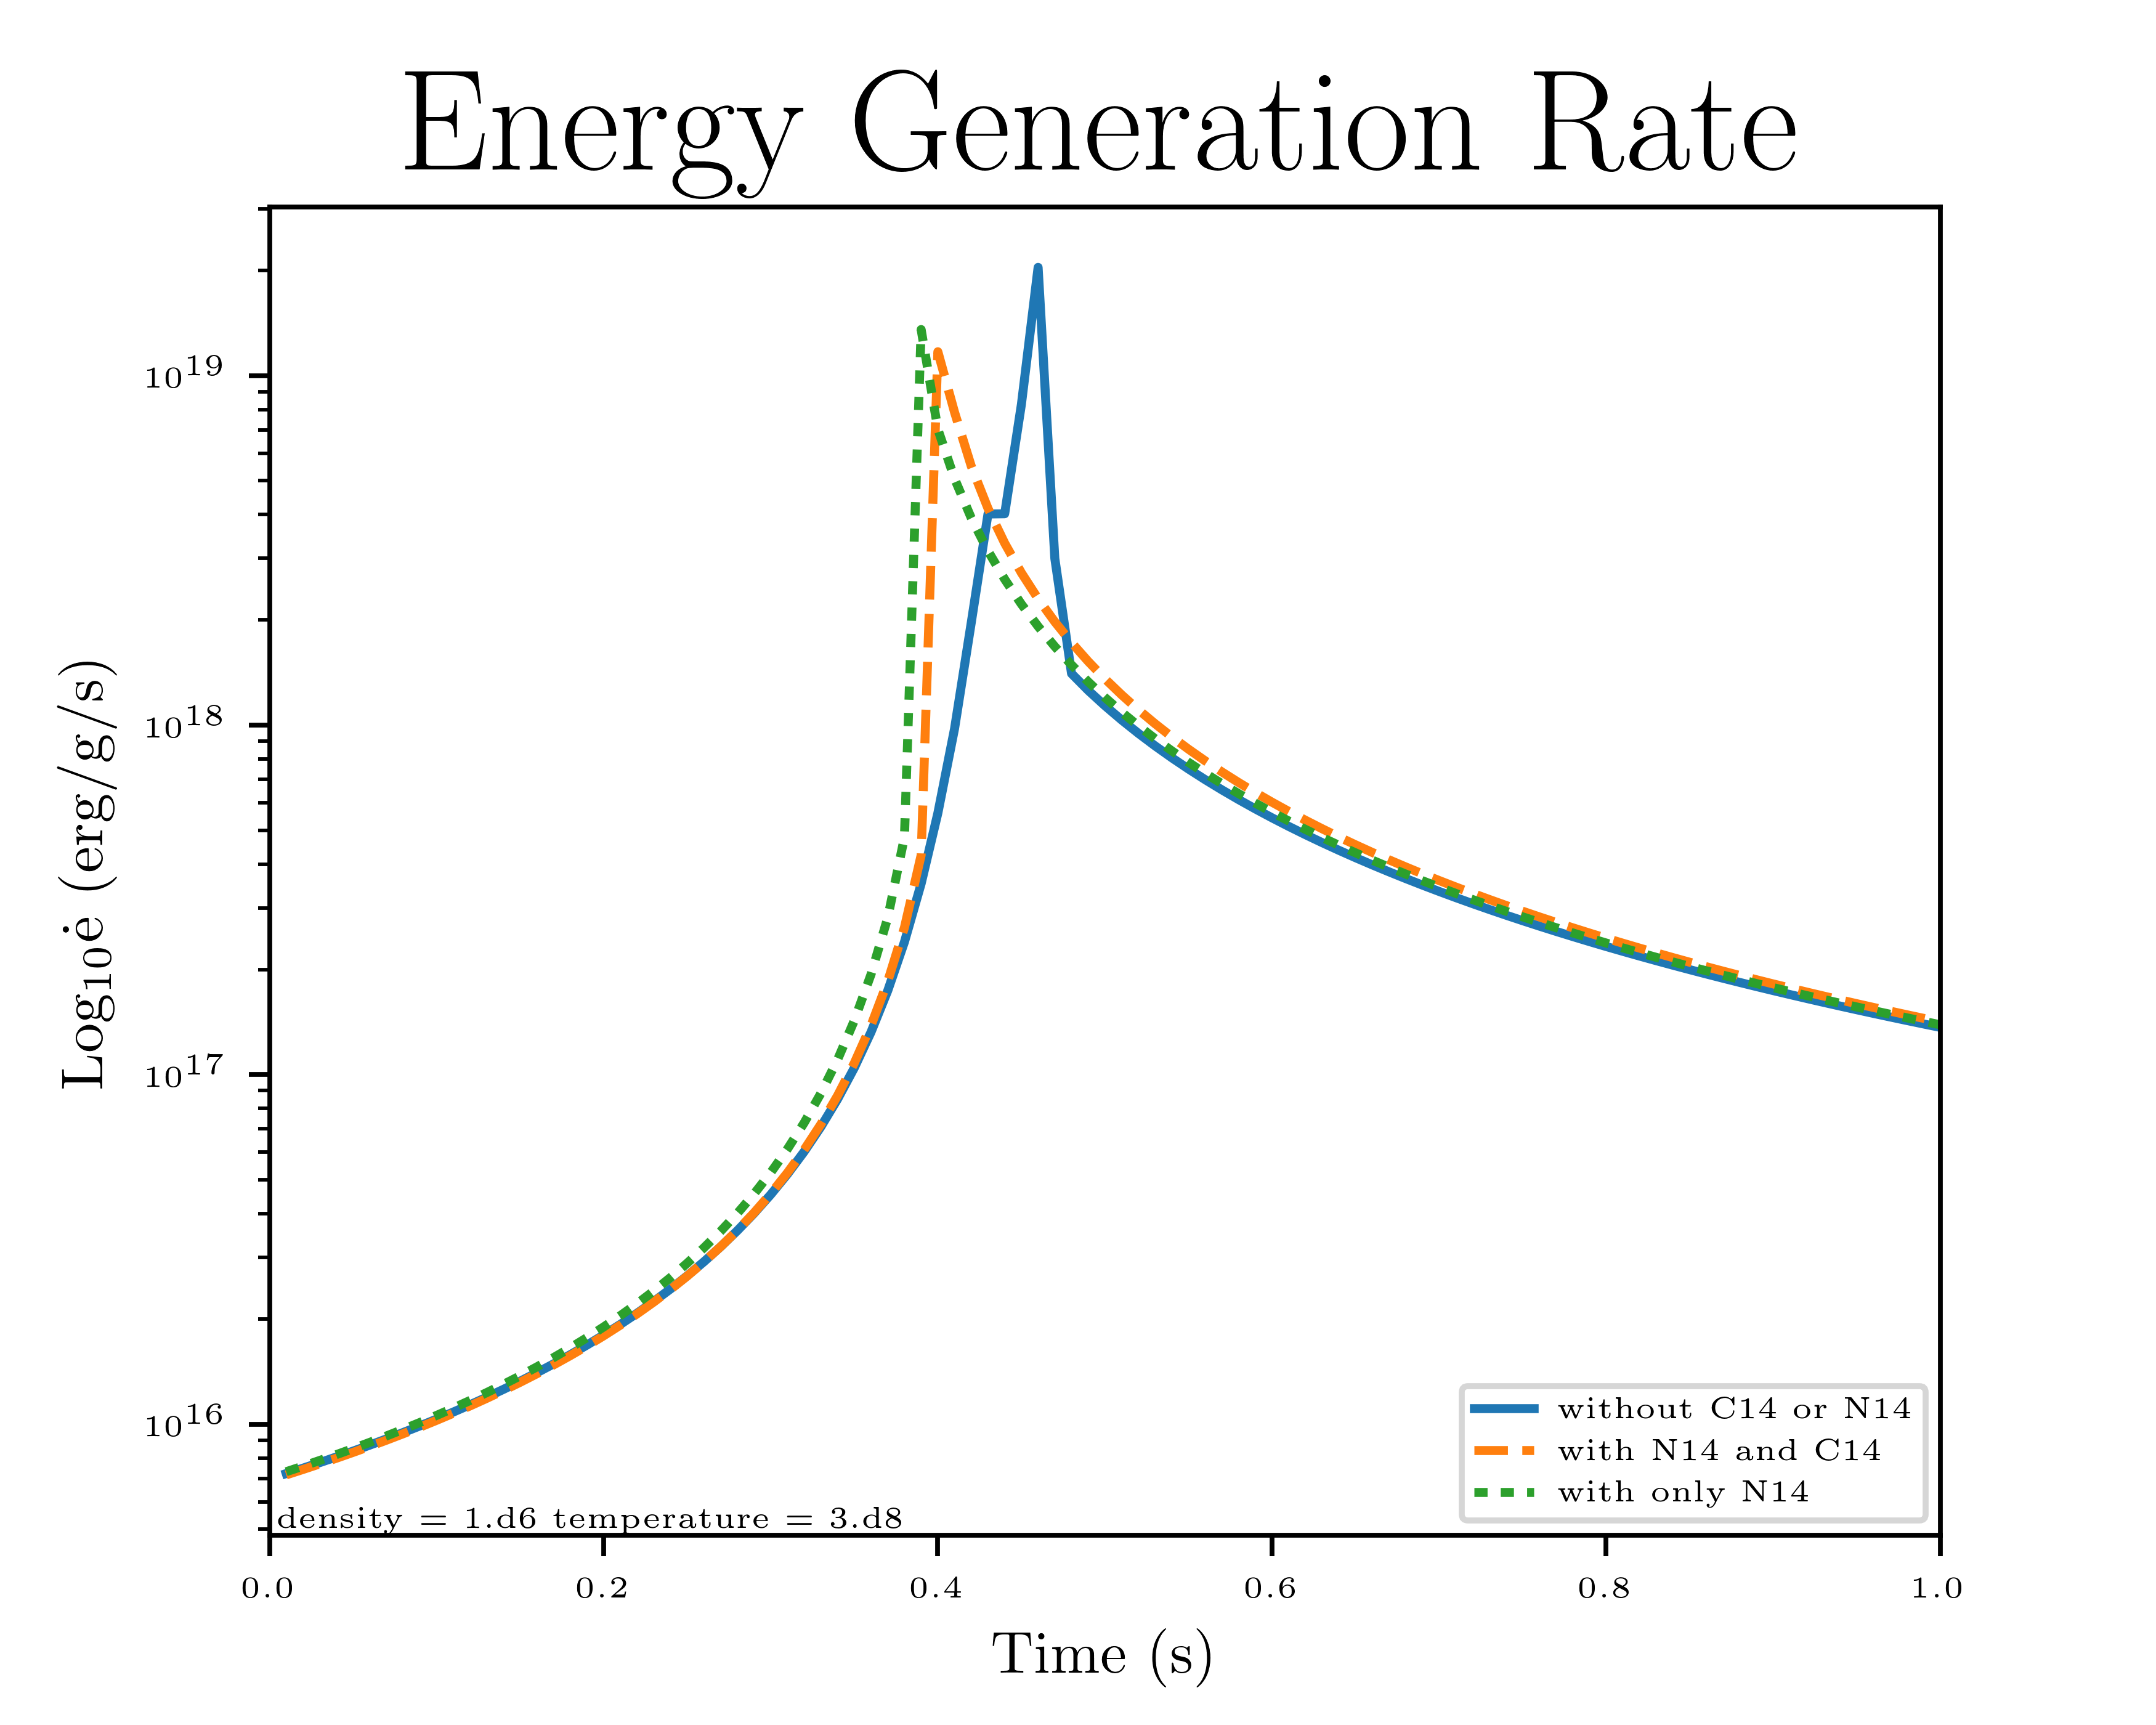

In [6]:
display(abby_energetics)

From Abby on the Slack:

This is using subch2 which is the network the C14(a,g)O18. Temperature is 3d8 K and density is 1d6 for both.

**The solid lines are initialized without C14 and N14:**  
X_C12, X_O16, X_He4 = [0.0495, 0.0495, 0.901]

**The dotted lines are initialized with N14 but not C14:**  
X_C12, X_O16, X_He4, X_N14 = [0.0495, 0.0495, 0.892, 0.009]

**The dashed lines are initialized with both C14 and N14:**  
X_C12, X_O16,  X_He4, X_N14, X_C14 = [0.0495, 0.0495, 0.892, 0.0045, 0.0045].

My ridiculously detailed digestion of a couple of plots, from Slack:

Here are my thoughts on @abbybishop plots and next steps.

**Thoughts on the science/modeling implications:**
- The most important result that initially jumps out at me is that the runs with N14 yield many protons via N14(a,g)F18(a,p)Ne21.  The protons appear to accumulate until C12(p,g)N13 can proceed.  This essentially consumes all of the available C12 and N14 immediately.  

The results are (a) reaching E_nuc a bit faster than triple alpha does, as shown in Abby's energetics plot, (b) significantly reducing the available C12 as compared to the baseline run without N14, and (c) a small but potentially important amount of protons left over.  This may matter for the energetics at the very end of a Maestro simulation and would be even more important in providing initial conditions for a Castro simulation of the explosion.

- As was hinted at in past work, it appears that it's not essential to include C14.  I would be OK with removing C14 and the corresponding reaction from the `subch` network, though we could also do some test runs with it to see if it even ends up slowing things down too much.  This was an extreme test where we assumed half of the N14 was processed via electron capture into C14 in prior evolution, which as I understand it is not very plausible (but it's nice we know this, in case a referee asks about it).

The arguments I can see for keeping C14 is that it might be interesting to have in a Castro model of the explosion, but if I was going to include it I would also want to include the electron capture on N14, as it might start to actually proceed in a Castro simulation (though perhaps very subdominantly).  It feels like something that is a higher order concern that we might not really want to expend energy on at this stage of the investigation.

- Even neglecting the runs with N14 and/or C14, just using the new network with the same initial composition I used in my work has yielded a new result.  Much of the O16 alpha captures into Ne20, which is important for understanding the nucleosynthesis of the simmering convective phase and establishing realistic 3D initial conditions for a Castro model.

**Issues that don't make sense to me:**

- The O18 abundance doesn't look right for the run without C14/N14. It looks like it's yielding O18 even though there's no C14 available as fuel for C14(a,g)O18. No other reactions in the net yield O18, so this shouldn't be possible. My guess is that something like an enforcement of sum(X_i) = 1 is artificially creating some O18. It's made a bit weirder by the fact that the run with only N14 yields no O18, as expected. It's a small amount, but it would be nice to know what's going on.

- Similar to the above, the little spike in N13 in the no C14/N14 run around t = 0.45s shouldn't be possible, nor should the tiny amount of protons created around this same time.  Both abundances are quite tiny, but it's another thing that it would be good to make sure we understand and are aware of when we proceed with an octant simulation.

**My recommended next steps:**

- Check that we understand the reason we're seeing the spurious abundances (e.g. the O18 mentioned above).

- Do as Mike suggested, and run two octant simulations with the new network.  In one, use the original composition (C12, O16 core, pure He4 envelope), in the other, use a C12/O16 core and an envelope with 99% He4, 1% N14.  Y'all can decide if you want to keep C14 and C14(a,g)O18 in the network or not. (edited)

I'm very happy to work with y'all to help setup and manage the models, including doing a Skype call or some such if you'd like. I have a stupid amount of code to help do this, but regrettably it's not necessarily easy to find/use at this point. Helping with this project could be a good time to figure out what's generically useful from it and could save Abby from having to reproduce similar code.

I currently have code that can manage most aspects of the modeling, including: generating an initial model, deriving from that model good `_parameters` and `inputs`, populating a directory with all the files needed to launch and execute a model on Titan, analyzing plotfiles for key properties that can give you an idea of how close the model is to explosion, monitoring the status of on-going jobs and your allocation usage, and making sure data is archived either in HPSS or in the non-purged home filesystem.